# **Group Project – Credit prediction**  
## Artificial Intelligence and Machine Learning 2022 – 2023



## **1) Exploratory Data Analysis**

### 1.0) Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") # this is useful when running the models later in the notebook

### 1.1) Importing the dataset
Since it is given as a csv file, we use the built-in **pandas** function to read the dataset.

In [2]:
data_df = pd.read_csv("credit_prediction.csv")

### 1.2) Showing the dimension of the dataset

In [3]:
data_df.shape # outputs number of rows x number of columns

(100000, 23)

Notice that the dataset has 100000 observations (rows), and 23 variables (columns).

### 1.3) General overview of the dataset
Using the function *.head()*, we extract the first 5 columns (by default) of the dataset. They are not useful for analytic purposes, but still enable us to visualize the dataset.

In [4]:
data_df.head()

,id,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,26.822620,265.0,No,80.415295,NaN,312.494089,Good
1,1,23.0,Scientist,NaN,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,NaN,266.0,No,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,28.609352,267.0,No,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,3,23.0,Scientist,19114.12,1824.843333,NaN,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,Good,809.98,31.377862,268.0,No,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,4,23.0,NaN,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,24.797347,269.0,No,41.420153,High_spent_Medium_value_payments,341.489231,Good


### 1.4) Gathering information from data

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  int64  
 1   Age                       90113 non-null   float64
 2   Occupation                89954 non-null   object 
 3   Annual_Income             89811 non-null   float64
 4   Monthly_Inhand_Salary     89881 non-null   float64
 5   Num_Bank_Accounts         89935 non-null   float64
 6   Num_Credit_Card           90131 non-null   float64
 7   Interest_Rate             89999 non-null   float64
 8   Num_of_Loan               90030 non-null   float64
 9   Type_of_Loan              89921 non-null   object 
 10  Delay_from_due_date       90053 non-null   float64
 11  Num_of_Delayed_Payment    89927 non-null   float64
 12  Changed_Credit_Limit      90077 non-null   float64
 13  Num_Credit_Inquiries      89971 non-null   fl

This visualization helps us a lot. In fact, we know that there are only two columns having complete information (hence, 0 null-values): *id* and *Credit_score*. On the other hand, all of the other columns include null-values: we will see later how to handle them.  
Moreover, we see that among 23 variables only 6 are categorical, while 17 are numerical. Again, we will see later how to handle the former ones.

### 1.5) Handling missing values
Although it may look like a task concerning data cleaning, we will handle missing values in exploratory data analysis in order to plot data and have a better visualization. In particular, we will adopt the following strategy to handle missing values: we will replace them with the mode, both in the case of categorical data and numerical data.  

We will avoid both rowise and columnswise deletion, thus mantaining as much information as possible to build a more accurate model.

##### General overview of null values

In [6]:
data_df.isnull().sum()

id                              0
Age                          9887
Occupation                  10046
Annual_Income               10189
Monthly_Inhand_Salary       10119
Num_Bank_Accounts           10065
Num_Credit_Card              9869
Interest_Rate               10001
Num_of_Loan                  9970
Type_of_Loan                10079
Delay_from_due_date          9947
Num_of_Delayed_Payment      10073
Changed_Credit_Limit         9923
Num_Credit_Inquiries        10029
Credit_Mix                  10105
Outstanding_Debt             9846
Credit_Utilization_Ratio    10012
Credit_History_Age           9984
Payment_of_Min_Amount        9958
Amount_invested_monthly     10045
Payment_Behaviour           10076
Monthly_Balance              9899
Credit_Score                    0
dtype: int64

Notice that on average, 10% of each column's values is made of null-values.

In [7]:
for column in data_df.columns:
    data_df[column].fillna(data_df[column].mode()[0], inplace=True)
data_df.isnull().sum()

id                          0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

We avoided long computations by using a single *for* loop that iterates over the columns of the dataframe and replaces the missing rows of each column with its mode. Now, using the command *.isnull().sum()*, we notice that there are no longer columns containing missing values.

### 1.6) Relevant features of numeric variables

Thanks to the function *describe*, one can show the most interesting features for each numerical variable, such as mean, standard deviation, quartiles, minimum and maximum.

In [8]:
data_df.describe()

,id,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05
mean,49999.500000,33.795250,56564.452515,4082.741972,5.426810,5.481080,13.871310,3.382150,20.469180,13.87475,10.249110,5.624520,1330.194566,31.066500,220.29518,1587.086647,-3.303000e+25
std,28867.657797,10.314077,40472.167201,3041.033506,2.464736,1.970386,8.519373,2.369626,14.172442,6.18341,6.304513,3.711699,1132.236575,6.074480,94.59550,3433.612104,9.959477e+25
min,0.000000,14.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-1.000000,-2.00000,0.500000,0.000000,0.230000,20.100770,1.00000,0.000000,-3.333333e+26
25%,24999.750000,25.000000,20347.965000,1724.938333,4.000000,4.000000,8.000000,2.000000,11.000000,9.00000,5.930000,3.000000,460.460000,26.592587,155.00000,76.153684,2.442807e+02
50%,49999.500000,35.000000,42274.960000,3080.555000,6.000000,5.000000,12.000000,3.000000,16.000000,15.00000,8.630000,5.000000,1036.990000,31.377506,213.00000,149.037636,3.173305e+02
75%,74999.250000,41.000000,88227.305000,5582.570625,7.000000,7.000000,19.000000,5.000000,27.000000,19.00000,13.870000,8.000000,1760.010000,36.033109,291.00000,372.057747,4.424400e+02
max,99999.000000,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.000000,9.000000,62.000000,25.00000,29.980000,17.000000,4998.070000,50.000000,404.00000,10000.000000,1.183931e+03


This overview enables us to highlight some insights. Among the latter we find that:

- The dataset includes only relatively young people, since the oldest one is 56 years old and the average age is around 34.
- Users tend to belong to the (upper) middle class, since the average monthly salary is approximately 4100 USD.
- Most of the users tend to have a high number of delayed payments (since 3rd quartile is 19), but at the same time the delay (in term of days) is not too high. In fact, the third quartile for the latter is 27 days, and the highest value is 62 days. Therefore, there is no user in the dataset that exceeds payments of more than two months.
- The outstanding debt is not high, since it is on average fixed to approximately 1300 USD, and the third quartile is approximately 1800 USD.

### 1.7) Insights on categorical variables

Through the function *.info()* we found out that among the 23 variabes, 6 of them were categorical. The latter are the following:
- Occupation
- Type_of_Loan
- Credit_Mix
- Payment_of_Min_Amount
- Payment_Behaviour
- Credit_Score

#### Insights of *Occupation*

In [9]:
data_df['Occupation'].value_counts() # how many times each unique job appears

Lawyer           16414
Engineer          6150
Architect         6147
Accountant        6073
Developer         6058
Teacher           6050
Mechanic          6049
Media_Manager     6047
Scientist         6033
Entrepreneur      5982
Doctor            5941
Journalist        5891
Manager           5777
Musician          5736
Writer            5652
Name: Occupation, dtype: int64

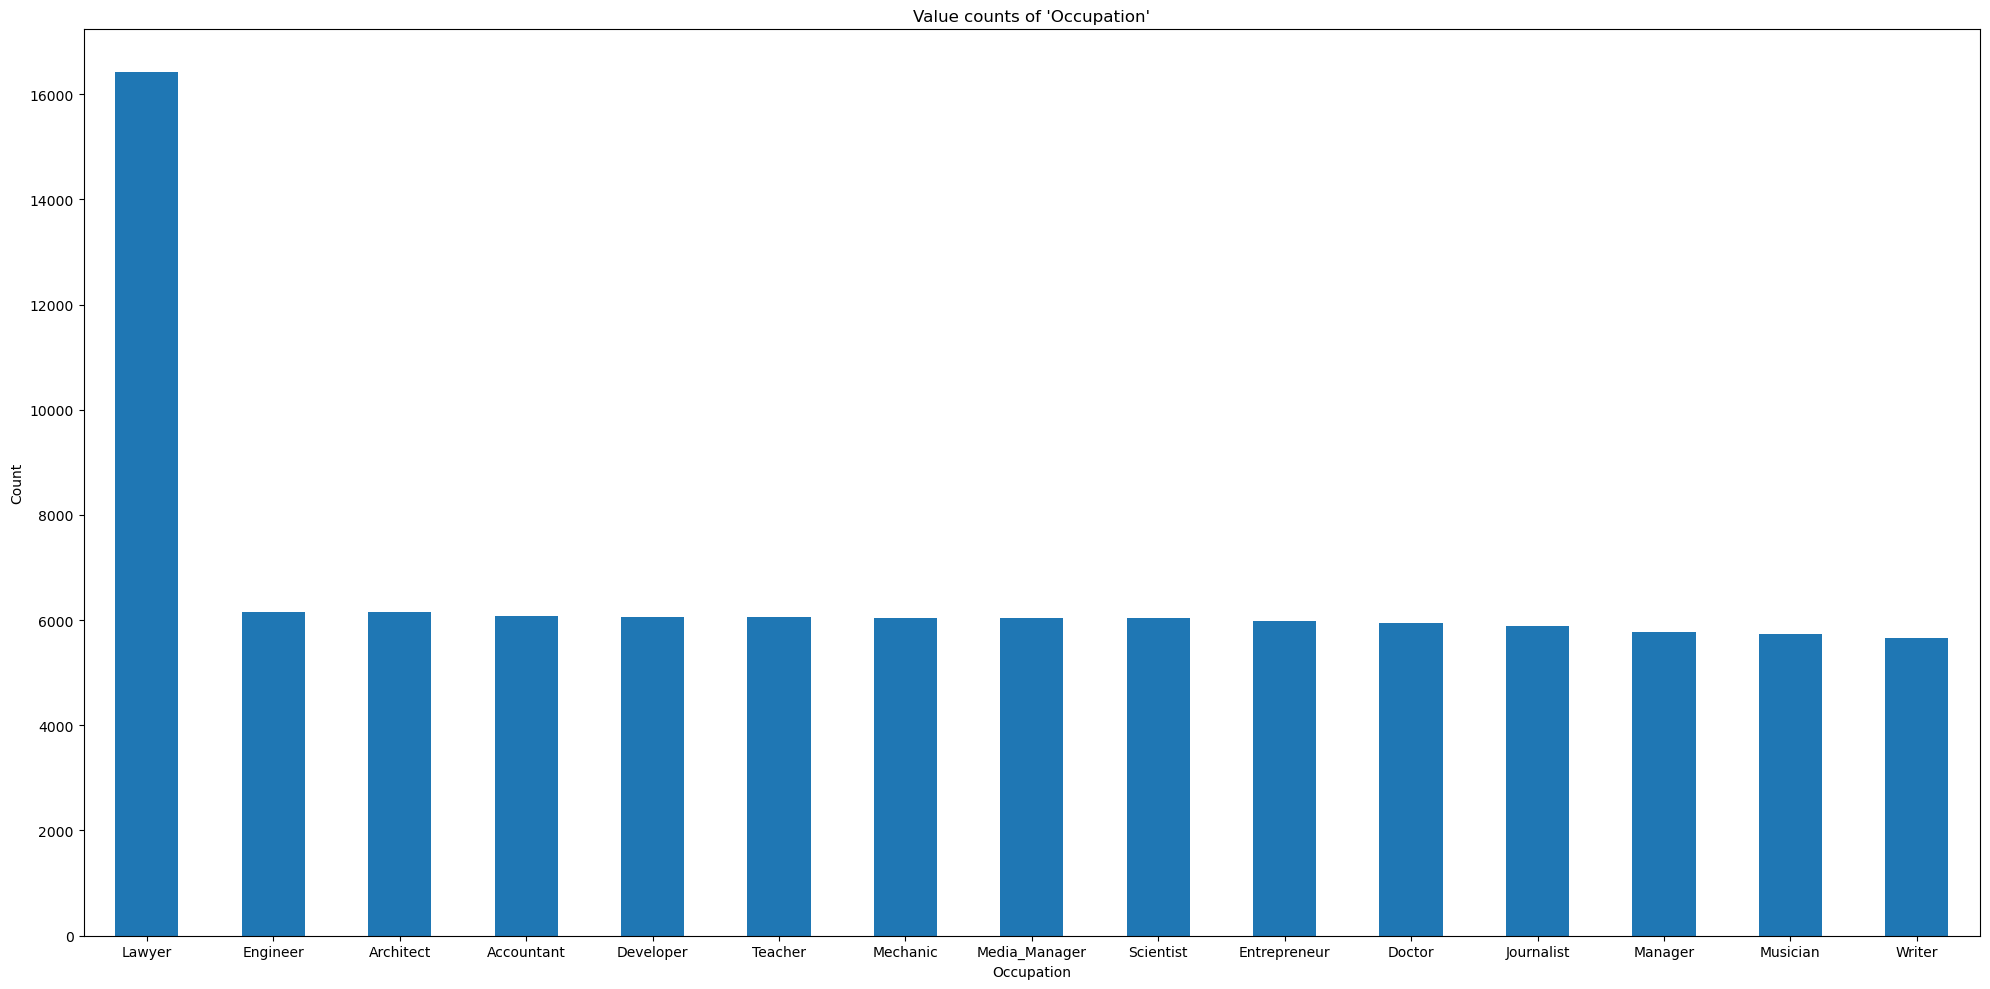

In [10]:
plt.figure(figsize=(20,10))
data_df['Occupation'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Occupation'")
plt.xlabel("Occupation")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

It is clearly evident that the dataset is quite balanced except for one value (at least under the point of view of occupation), since there are many more lawyers than other employees.

#### Insights of *Type_of_Loan*

In [11]:
data_df['Type_of_Loan'].value_counts();

Notice that the variable is a multiattribute one, since a person may have multiple loans of many types.

#### Insights of *Credit_Mix*

In [12]:
data_df['Credit_Mix'].value_counts()

Standard    51328
Good        27173
Bad         21499
Name: Credit_Mix, dtype: int64

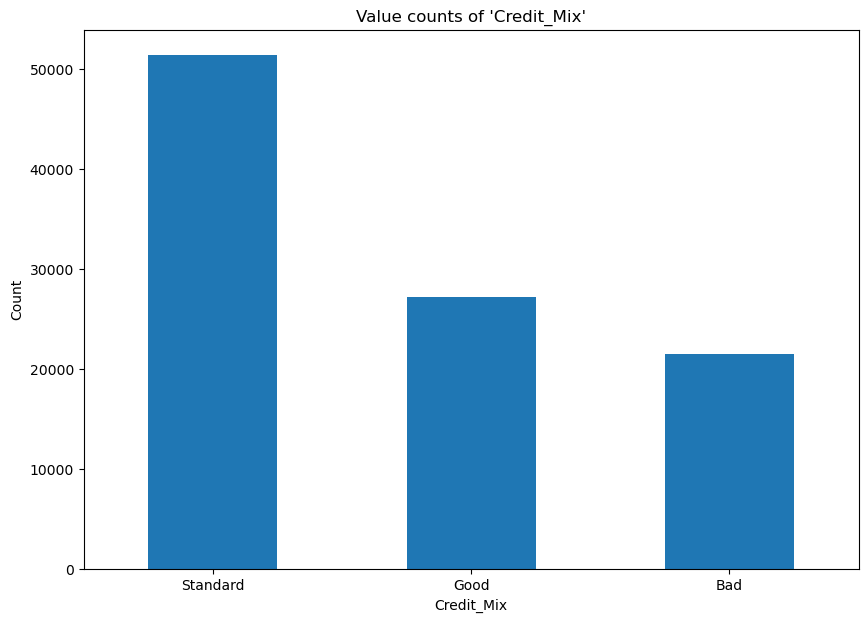

In [13]:
plt.figure(figsize=(10,7))
data_df['Credit_Mix'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Credit_Mix'")
plt.xlabel("Credit_Mix")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

*Standard* classification of the mix of credits is the most frequent, followed by *Good* and, finally, *Bad*.

#### Insights on *Payment_of_Min_Amount*

In [14]:
data_df['Payment_of_Min_Amount'].value_counts()

Yes    57035
No     32079
NM     10886
Name: Payment_of_Min_Amount, dtype: int64

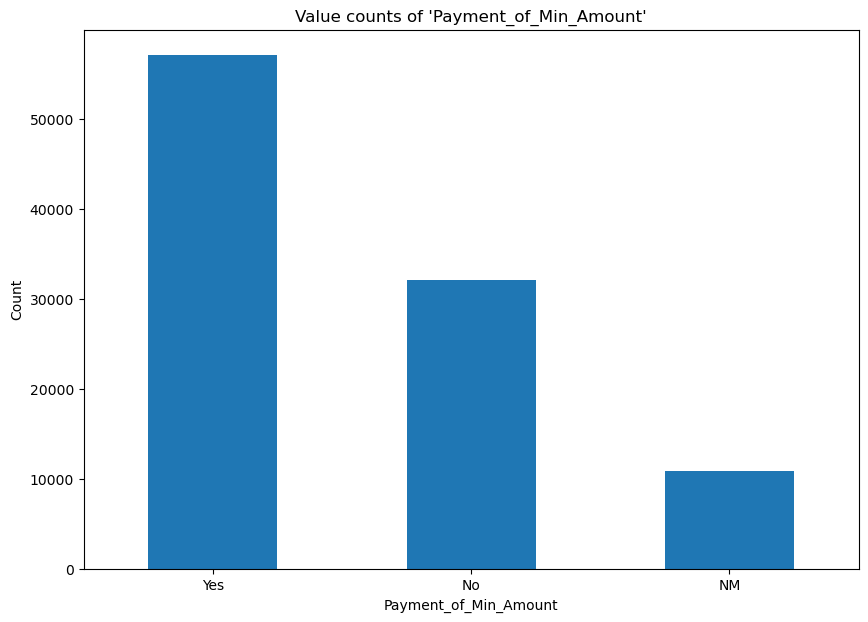

In [15]:
plt.figure(figsize=(10,7))
data_df['Payment_of_Min_Amount'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Payment_of_Min_Amount'")
plt.xlabel("Payment_of_Min_Amount")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

This variable represents whether only the minimum amount was paid by
the person. It seems that most of the times the answer is *Yes*.

#### Insights on *Payment_Behaviour*

In [16]:
data_df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      35426
High_spent_Medium_value_payments    17694
Low_spent_Medium_value_payments     13265
High_spent_Large_value_payments     13184
High_spent_Small_value_payments     10694
Low_spent_Large_value_payments       9737
Name: Payment_Behaviour, dtype: int64

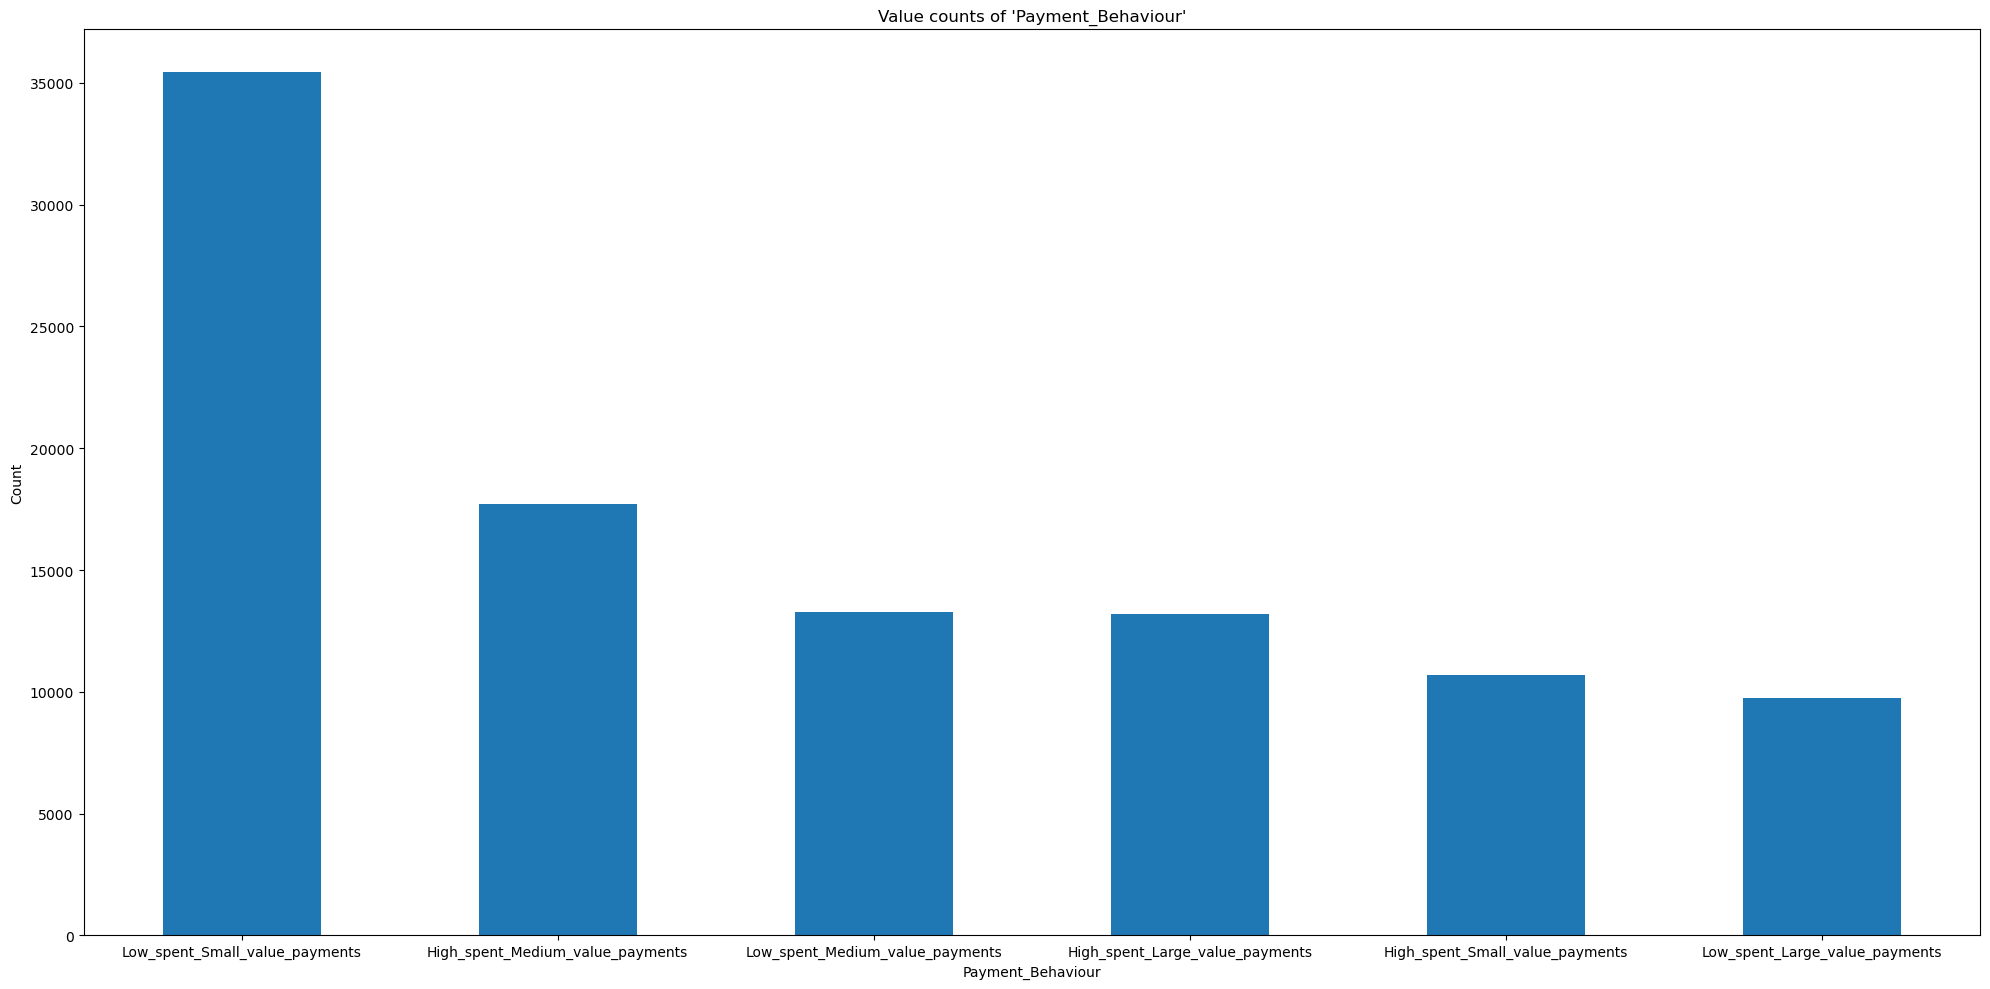

In [17]:
plt.figure(figsize=(20,10))
data_df['Payment_Behaviour'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Payment_Behaviour'")
plt.xlabel("Payment_Behaviour")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

*Low_spent_Small_value_payments* are the most frequent.

#### Insights on *Credit_Score*
Since *Credit_Score* is the variable we aim to predict (hence it is our target variable), it is particularly interesting to see some insights.

In [18]:
data_df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

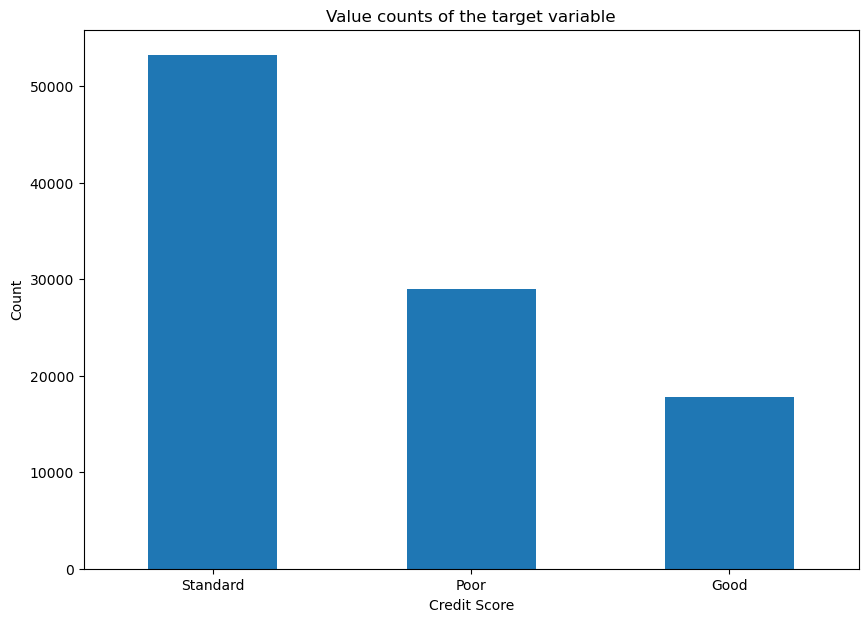

In [19]:
plt.figure(figsize=(10,7))
data_df['Credit_Score'].value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Credit Score")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

The plot shows us in a clear way that most of the users of our datasets are labelled as *Standard* credit score users.  

Notice that what we have deduced from the plots might have been obtained even using the *.mode()* function.

### 1.8) Insights on numerical variables

Since we're focusing on numerical variables, it is possible to compute correlation. In order to achieve such goal we will use the *.corr()* function. 

In [20]:
data_df.corr()

,id,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance
id,1.000000,0.003928,-0.006904,-0.003047,0.003438,-0.003064,0.004888,-0.007490,-0.005405,0.002836,0.008075,-0.002166,0.003925,-0.008959,-0.005988,0.000505,-0.003589
Age,0.003928,1.000000,0.076864,0.081069,-0.171239,-0.131825,-0.188201,-0.188940,-0.155521,-0.159038,-0.141264,-0.221927,-0.176598,0.013245,0.211021,0.002623,0.002658
Annual_Income,-0.006904,0.076864,1.000000,0.797872,-0.228116,-0.175864,-0.238290,-0.203708,-0.199158,-0.222368,-0.141100,-0.223483,-0.209089,0.115625,0.220930,0.025391,-0.003375
Monthly_Inhand_Salary,-0.003047,0.081069,0.797872,1.000000,-0.251379,-0.192278,-0.261682,-0.224970,-0.220592,-0.242914,-0.155790,-0.246659,-0.233517,0.125318,0.241836,0.028376,0.002562
Num_Bank_Accounts,0.003438,-0.171239,-0.228116,-0.251379,1.000000,0.396606,0.509492,0.416166,0.499245,0.520985,0.296989,0.457542,0.440399,-0.049145,-0.434820,-0.013199,0.000452
Num_Credit_Card,-0.003064,-0.131825,-0.175864,-0.192278,0.396606,1.000000,0.434278,0.368011,0.427296,0.366229,0.227202,0.407610,0.426837,-0.038176,-0.373831,-0.007585,-0.002531
Interest_Rate,0.004888,-0.188201,-0.238290,-0.261682,0.509492,0.434278,1.000000,0.481802,0.515039,0.479998,0.322939,0.546554,0.531683,-0.052040,-0.505162,-0.015713,0.000439
Num_of_Loan,-0.007490,-0.188940,-0.203708,-0.224970,0.416166,0.368011,0.481802,1.000000,0.440589,0.401980,0.329039,0.493544,0.547098,-0.070778,-0.536274,-0.009590,-0.004368
Delay_from_due_date,-0.005405,-0.155521,-0.199158,-0.220592,0.499245,0.427296,0.515039,0.440589,1.000000,0.462616,0.263995,0.477262,0.495868,-0.039908,-0.437551,-0.008768,-0.003315
Num_of_Delayed_Payment,0.002836,-0.159038,-0.222368,-0.242914,0.520985,0.366229,0.479998,0.401980,0.462616,1.000000,0.281492,0.427285,0.421136,-0.048411,-0.414391,-0.017011,0.000530


We are interested in generating a plot for each numerical variable. Recall that the dataset consists of 17 numerical variables, but one of the latter is *id*, which is not useful for any purpose. Hence, we get to 16 numerical variables of interest. The idea is to generate 16 subplots.

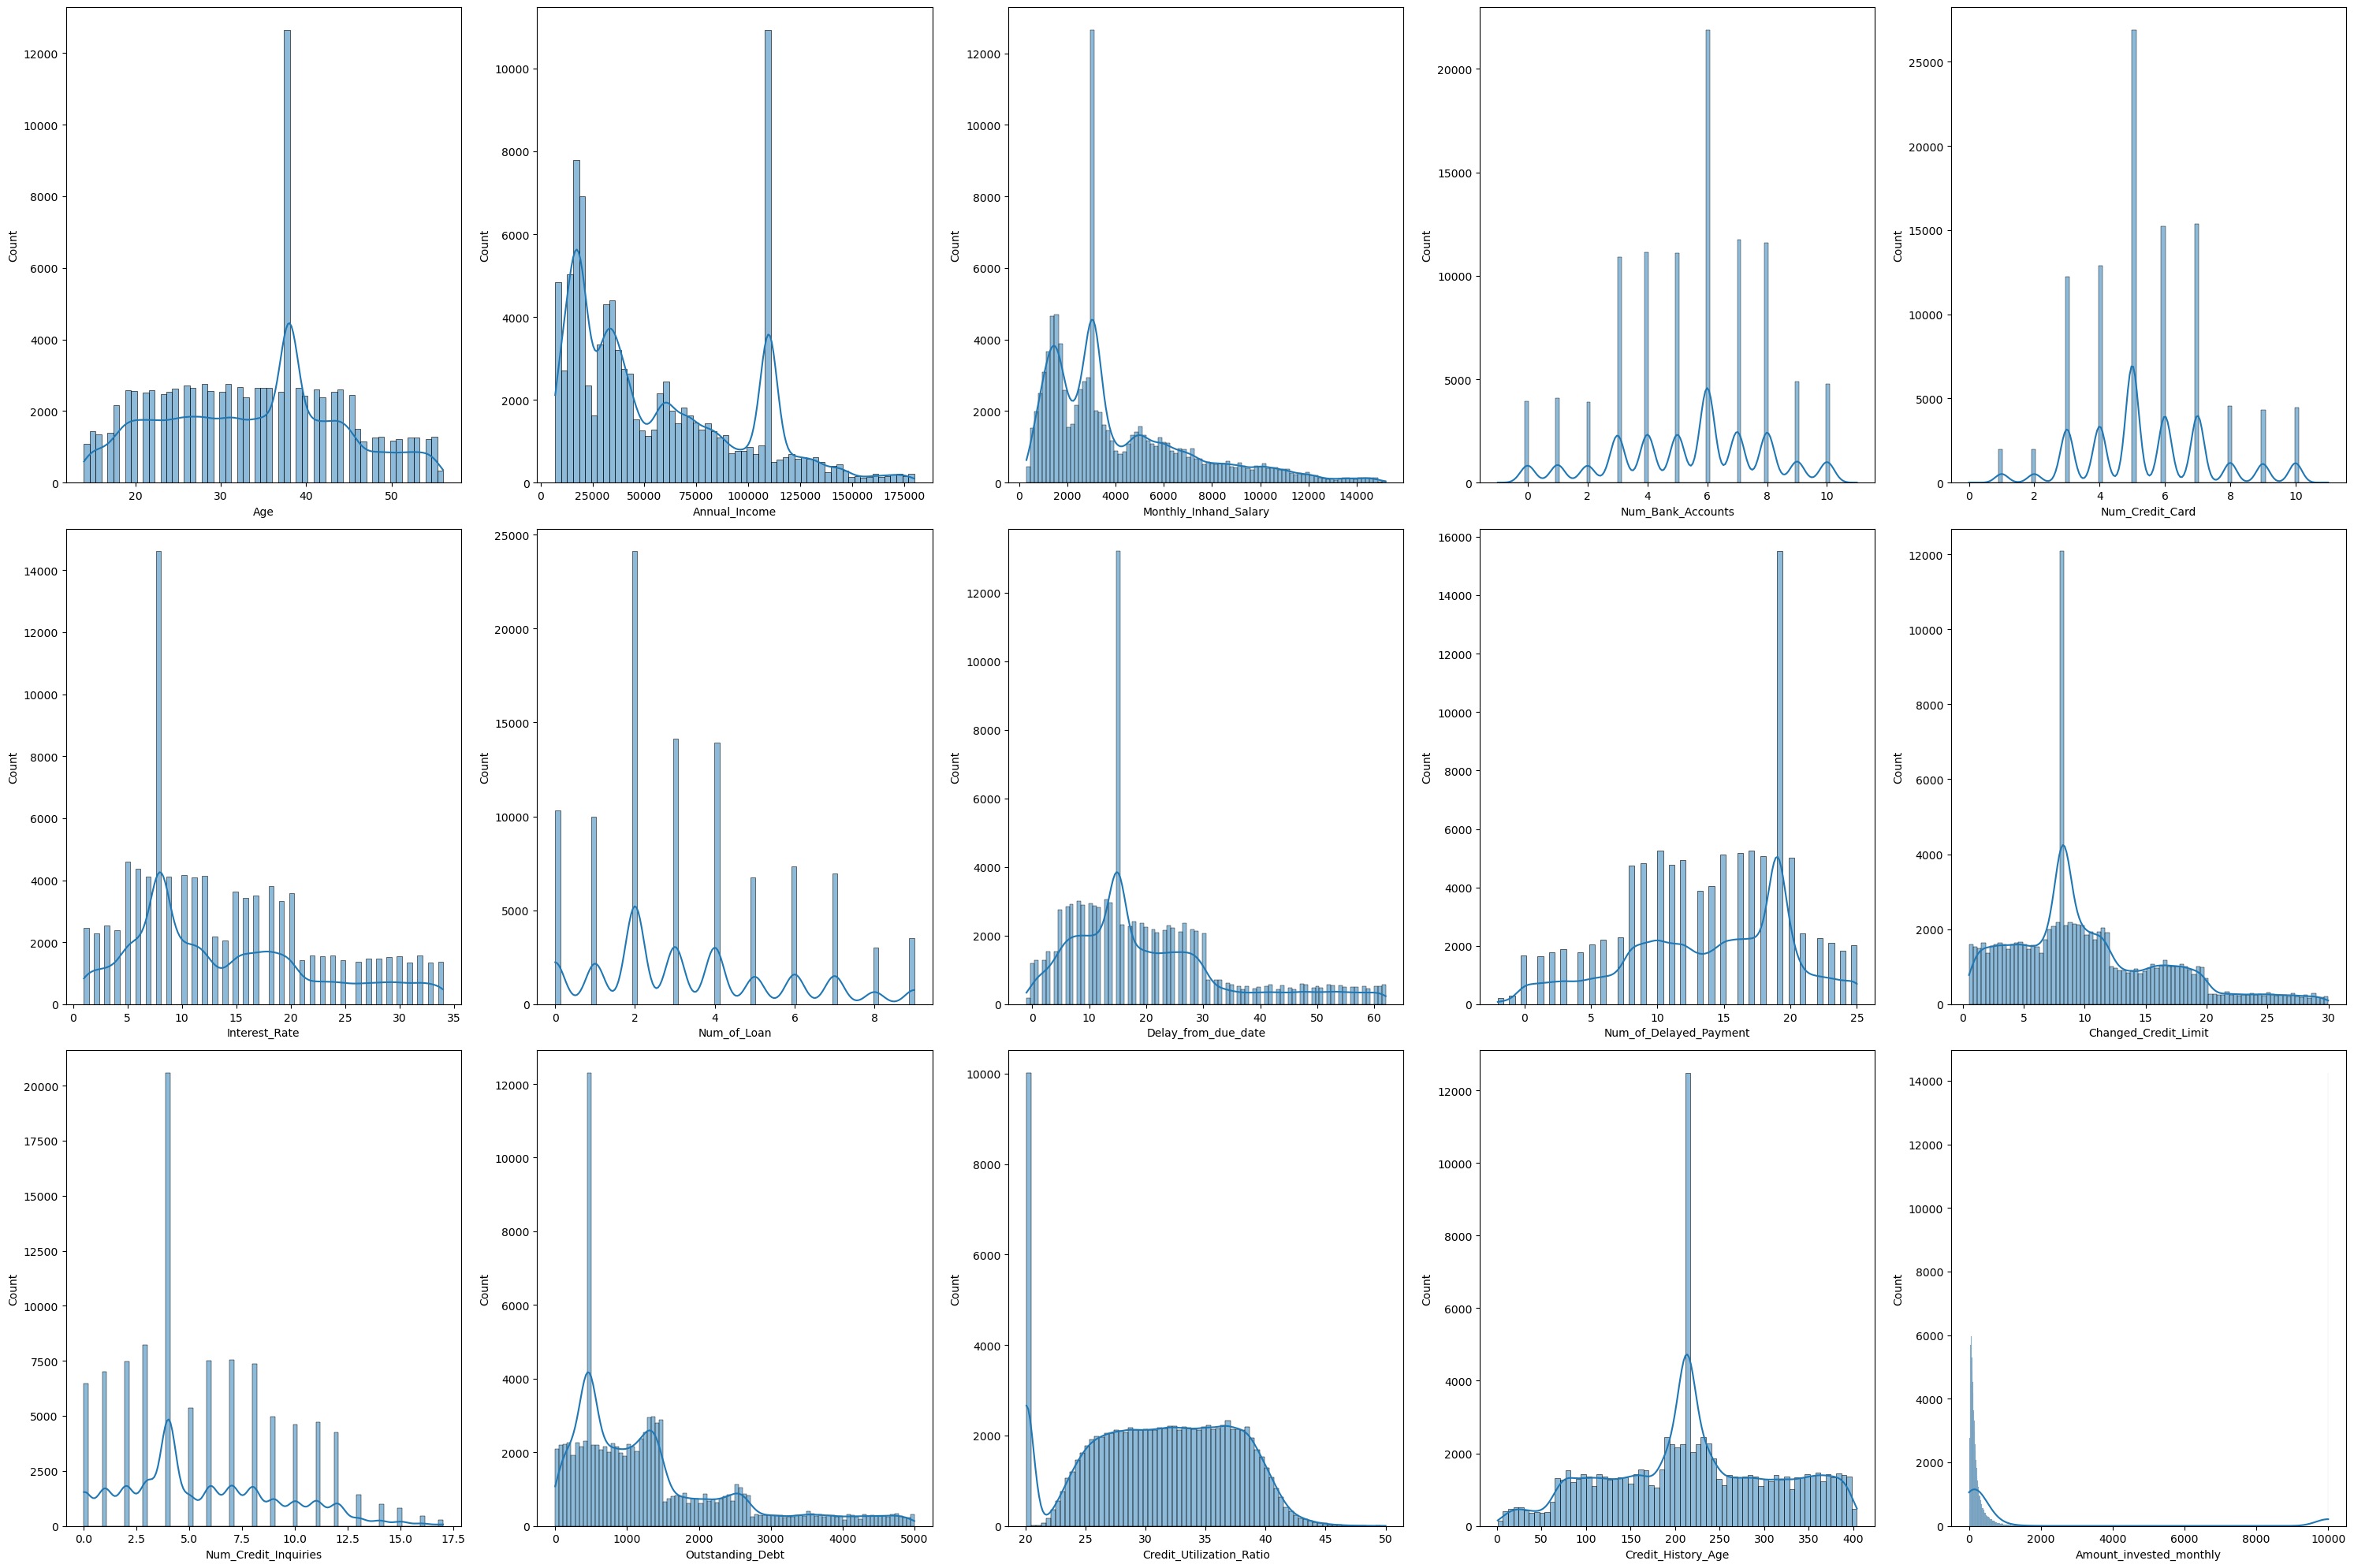

In [21]:
fig, axes = plt.subplots(3,5, figsize=(30,20))

sns.histplot(ax=axes[0, 0], data=data_df, x='Age', kde=True)
sns.histplot(ax=axes[0, 1], data=data_df, x='Annual_Income', kde=True)
sns.histplot(ax=axes[0, 2], data=data_df, x='Monthly_Inhand_Salary', kde=True)
sns.histplot(ax=axes[0, 3], data=data_df, x='Num_Bank_Accounts', kde=True)
sns.histplot(ax=axes[0, 4], data=data_df, x='Num_Credit_Card', kde=True)
sns.histplot(ax=axes[1, 0], data=data_df, x='Interest_Rate', kde=True)
sns.histplot(ax=axes[1, 1], data=data_df, x='Num_of_Loan', kde=True)
sns.histplot(ax=axes[1, 2], data=data_df, x='Delay_from_due_date', kde=True)
sns.histplot(ax=axes[1, 3], data=data_df, x='Num_of_Delayed_Payment', kde=True)
sns.histplot(ax=axes[1, 4], data=data_df, x='Changed_Credit_Limit', kde=True)
sns.histplot(ax=axes[2, 0], data=data_df, x='Num_Credit_Inquiries', kde=True)
sns.histplot(ax=axes[2, 1], data=data_df, x='Outstanding_Debt', kde=True)
sns.histplot(ax=axes[2, 2], data=data_df, x='Credit_Utilization_Ratio', kde=True)
sns.histplot(ax=axes[2, 3], data=data_df, x='Credit_History_Age', kde=True)
sns.histplot(ax=axes[2, 4], data=data_df, x='Amount_invested_monthly', kde=True)


plt.tight_layout()

**Notice that it is not possible to plot the histogram for the last numerical variable, namely *Monthly_Balance*, since the maximum allowed size would be exceeded. Although we tried to split the subplots in many smaller plots, it is still not possible. In fact, it is not even possible to plot the histogram for such variable only (for the aforementioned reason)**

In order visualize the histogram of one variable only, pass its name as parameter of the following function.

In [22]:
def histogram(var_name):
    plt.figure(figsize=(15,10))
    sns.histplot(data=data_df, x=var_name, kde=True)
#histogram('Age')

## 2) Preprocessing data

Preprocessing phase is one of the most crucial ones when it comes to create machine learning models. It usually consists of the following stages:

1. Handling missing values
2. Inspecting for redundancy
3. Column cleanup
4. Removing outliers

In particular, we have already covered point 1. in the previous sections, when dealing with exploratory data analysis. In particular, we have replaced all the missing rows of each attribute with its mode. Furthermore we do not need to check for redundancy (point 2. of the list) since we know that each row corresponds to a different user, identified by a unique ID. Hence, we will focus on the remaining points of the aforementioned list.

### 2.3) Column cleanup
In this section we are going to convert all the variables' names into lower case.

In [23]:
data_df.columns = [col.lower() for col in data_df]

### 2.4) Removing outliers
Recall that we define as "outlier" any observation - for a given variable - differing more than a certain small quantity with respect to the other observations of that variable. In simpler words, any data point far away from the distribution of data points is regarded as an outlier. In order to visualize such outliers for every numerical variables, we are going to create several boxplots. Then we will look at every boxplot and points not included in the quartiles will be outilers.

#### Creating the boxplots
Notice that we are going to create boxplots for numerical variables only. In fact, we are not interested in looking for outliers of categorical variables for two reasons:
- the concept of "outlier" for categorical data is hard to define
- once we will do *OneHotEncoding*, all categorical instances will be converted into 0s and 1s

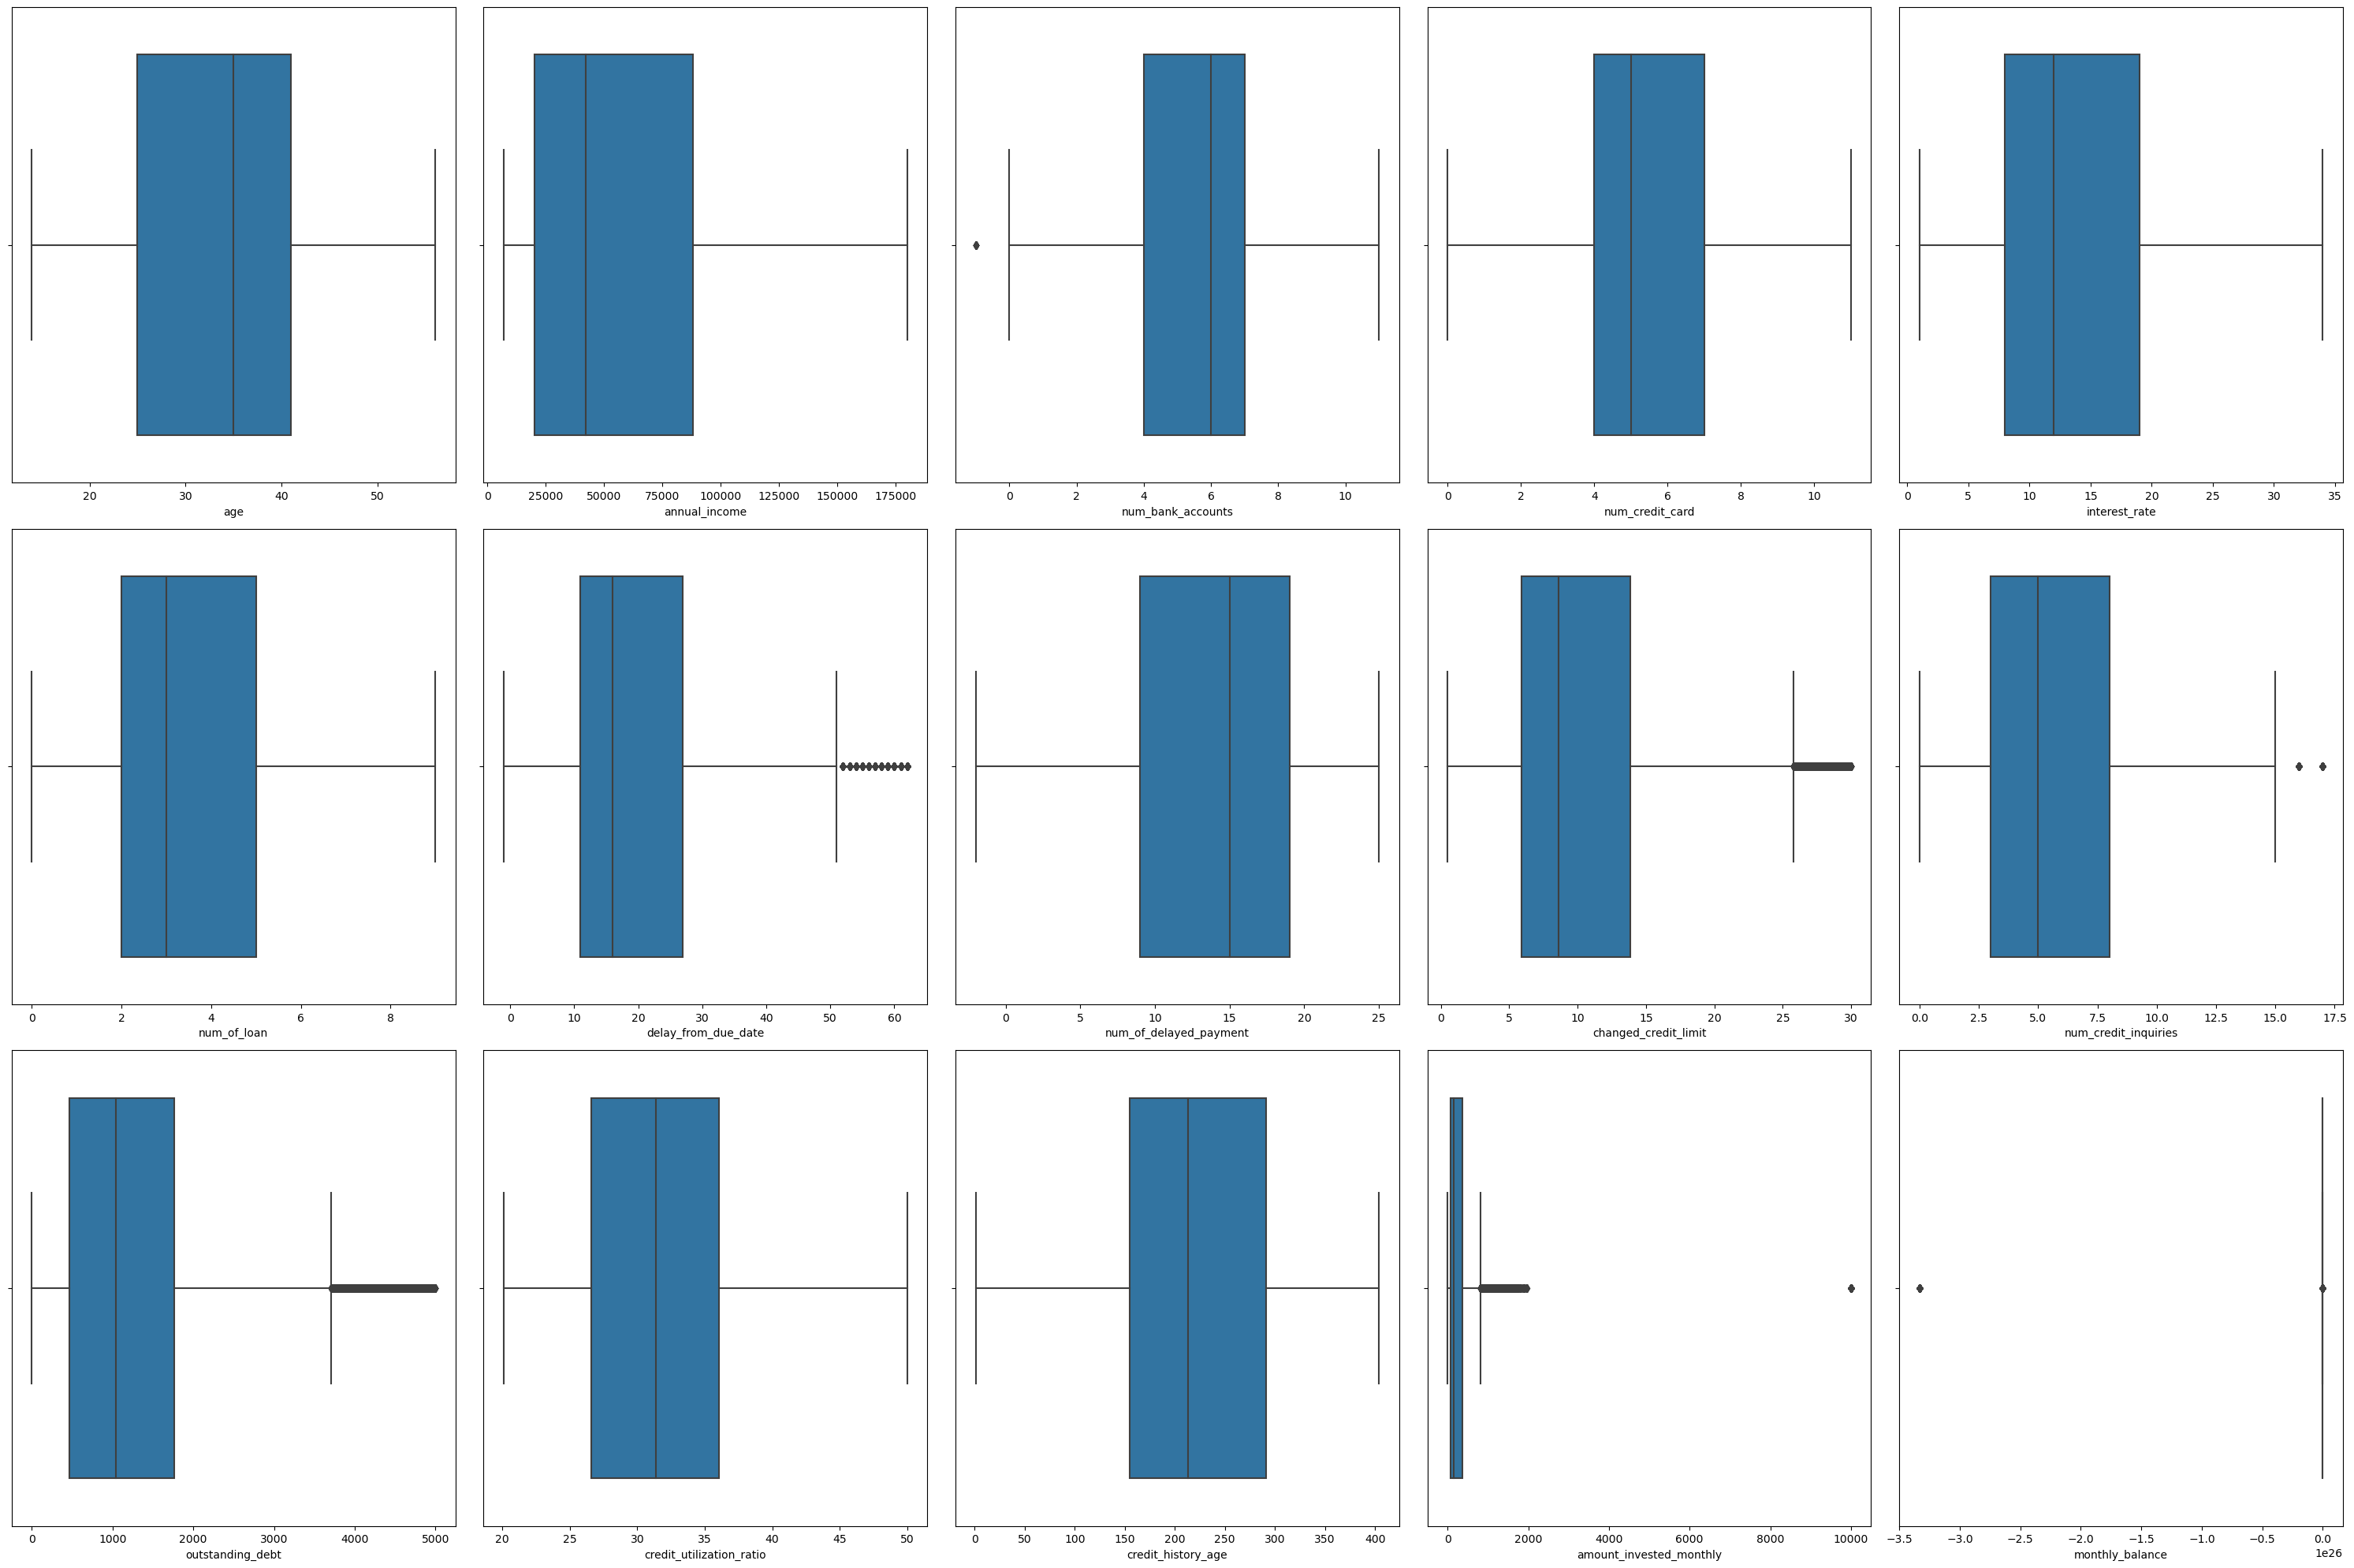

In [24]:
fig, axes = plt.subplots(3,5, figsize=(30,20))

sns.boxplot(ax=axes[0, 0], x=data_df["age"])
sns.boxplot(ax=axes[0, 1], x=data_df["annual_income"])
sns.boxplot(ax=axes[0, 2], x=data_df["num_bank_accounts"])
sns.boxplot(ax=axes[0, 3], x=data_df["num_credit_card"])
sns.boxplot(ax=axes[0, 4], x=data_df["interest_rate"])
sns.boxplot(ax=axes[1, 0], x=data_df["num_of_loan"])
sns.boxplot(ax=axes[1, 1], x=data_df["delay_from_due_date"])
sns.boxplot(ax=axes[1, 2], x=data_df["num_of_delayed_payment"])
sns.boxplot(ax=axes[1, 3], x=data_df["changed_credit_limit"])
sns.boxplot(ax=axes[1, 4], x=data_df["num_credit_inquiries"])
sns.boxplot(ax=axes[2, 0], x=data_df["outstanding_debt"])
sns.boxplot(ax=axes[2, 1], x=data_df["credit_utilization_ratio"])
sns.boxplot(ax=axes[2, 2], x=data_df["credit_history_age"])
sns.boxplot(ax=axes[2, 3], x=data_df["amount_invested_monthly"])
sns.boxplot(ax=axes[2, 4], x=data_df["monthly_balance"])

plt.tight_layout()

As you may notice, not all the variables have outliers. Here are the only ones collecting them:
- num_bank_accounts
- delay_from_due_date
- changed_credit_limit
- num_credit_inquiries
- outstanding_debt
- amount_invested_monthly
- monthly_balance

Hence, we will focus on such variables only when looking for outliers.

#### Two-step approach to remove outliers
To remove the outliers from multiple columns we are going to adopt a two-step approach:
- we define a function named "outliers" which returns a list of indexes of outliers;
- we use the indexes of such outliers and remove them from the original dataset.

In [25]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25) #first quantile
    Q3 = df[ft].quantile(0.75) #second quantile
    IQR = Q3 - Q1 #interquantile range

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)] # stores the indexes of the outliers, hence all values either < lower bound
                                                                    # or > upper bound
    return ls

We now create an empty list to store the output indexes from multiple columns.

In [26]:
index_list = []

#extract outliers from all the columns
columns = ['num_bank_accounts', 'delay_from_due_date', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 'amount_invested_monthly', 'monthly_balance']
for column in columns:
    index_list.extend(outliers(data_df, column))

#to visualize such list:
#index_list

We now define a function called "remove" which returns a cleaned dataframe without outliers.

In [27]:
def remove(df, ls):

    #process the list of indexes, since it may be not sorted or not unique
    ls = sorted(set(ls))

    df = df.drop(ls) # dropping rows containing outliers

    return df

In [28]:
# calling the function to remove the outliers
data_df_cleaned = remove(data_df, index_list)

#checking the shape of the new dataframe
print(data_df.shape)
print(data_df_cleaned.shape)

(100000, 23)
(59884, 23)


## **3) Generating training set and test set**
After an analysis of how each variable may influence on the final prediction, we noticed that not all the variables were useful for the final aim. In particular, we decided not to use the following variable:
- *id* (index 0): it is just a sequence of distinct integers identifying customers, hence useless.

**IMPORTANT:**
Before generating the training set and test set, we encode categorical data into integers. 

To achieve such aim, we will first apply *LabelEncoder* on categorical data, thus to encode them into integers. Then, we will apply *StandardScaler* to numerical data and *OneHotEncoder* to initial categorical data.

### 3.1) Selecting numerical and categorical variables

In [29]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
data = data_df_cleaned.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)
#print(numerical_columns)
#print(categorical_columns)
#data

### 3.2) LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder
data_df_cleaned['occupation'] = LabelEncoder().fit_transform(data_df_cleaned['occupation'])
data_df_cleaned['type_of_loan'] = LabelEncoder().fit_transform(data_df_cleaned['type_of_loan'])
data_df_cleaned['credit_mix'] = LabelEncoder().fit_transform(data_df_cleaned['credit_mix'])
data_df_cleaned['payment_behaviour'] = LabelEncoder().fit_transform(data_df_cleaned['payment_behaviour'])
data_df_cleaned['payment_of_min_amount'] = LabelEncoder().fit_transform(data_df_cleaned['payment_of_min_amount'])

### 3.3) StandardScaler and OneHotEncoder

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers = [
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])


### 3.4) Splitting the dataset

In [32]:
X = data_df_cleaned.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]] #independent variables
y = data_df_cleaned.iloc[:, 22] #dependent variables

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (44913, 21)
X_test shape: (14971, 21)


We have generated a training set containing 75% of the observations and a test set containing the remaining 25%.

### 3.5) Fit and Transform

We will finally apply *fit_transform* on the training set, and simply *transform* on the test set.

**Recall that we never do *fit_transform* on the test set!**


In [33]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## **4) Testing Classifiers**
 In this section we are going to build and test several models. Here are the ones we have selected for our analysis:
 1. K-Nearest Neighbours (KNN)
 2. Kernel Support Vector Machine (Kernel SVM)
 3. XGBoost
 4. Classification and Regression Tree (CART)
 5. Artificial Neural Network (ANN)

**IMPORTANT!**
 Notice that for each of the following cells, so for each of the following models, we will even compute the right metrics and the performances on the test set. **Hence, point 5 and point 6 of the task are all included in this one.**

### 4.0) Importing libraries

In [35]:
from sklearn.svm import SVC 
from sklearn import neighbors
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score
import time 

**WARNING!** To carry on the execution in a period of time similar to the best ones we got (see results) we suggest that you uncomment the block of code for each model and run it separately.
Alternatively, if you make sure that your computer will not slow down its processes, you can uncomment them all al run everything at once.

### 4.1) KNN 

In [36]:

start_time = time.time() # We start counting the time at this point

# The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter
param_grid = {'n_neighbors': [3,5,8,10], 'weights':['uniform', 'distance'], 'metric': ['manhattan', 'euclidean', 'cosine', 'chebyshev']}
KNN = neighbors.KNeighborsClassifier()
clf_KNN = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1) # cv=10 allows us to make 10-fold cross validation

# Fitting the model
clf_KNN.fit(X_train, y_train)

# To obtain the best parameters
clf_KNN_best_params = clf_KNN.best_params_
print(clf_KNN_best_params)

# To obtain the best trained classifier
y_pred_KNN = clf_KNN.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_KNN))

end_time = time.time() # We stop counting the time at this point
time_KNN = end_time - start_time # Total time needed
print(time_KNN)


Fitting 10 folds for each of 32 candidates, totalling 320 fits
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
              precision    recall  f1-score   support

        Good       0.70      0.69      0.69      2716
        Poor       0.75      0.74      0.74      3946
    Standard       0.79      0.80      0.80      8309

    accuracy                           0.76     14971
   macro avg       0.75      0.74      0.74     14971
weighted avg       0.76      0.76      0.76     14971

3385.158224105835


### Description of the code

At the beginning of the cell we consider the starting-time through "time.time()", and we do the same at the end of the cell, once the model will be entirely executed. In this way, performing the subtraction "end_time - start_time" we will obtain the total time needed to run the model.

Then we instantiate a dictionary named "param_grid", containing all the hyperparameters that will be explored when performing GridSearch. Among such parameters we find:
1. the number of neighbours (note that it doesn't make sense to select high value for such parameter);
2. the weights of each data point. In particular, using "uniform" all points in each neighborhood are weighted equally. Instead, using "distance" closer neighbors of a query point will have a greater influence than neighbors which are further away;
3. the metric, associated to several distance metric classes. Of course we did not use **ALL** the identifiers. In fact, many of them are missing, such as "minkowski", "wminkowski", etc.

Then, we instantiate the classifier - in this case "KNeighborsClassifier" - and perform GridSearch. As you may notice, we pass some parameters to GridSearch:
1. the estimator, previously instatiated;
2. the dictionary containing all hyperparameters we want to test, namely "param_grid". The idea is to set all possible hyperparameters in such dictionary, and let the model find the optimal ones;
3. the cross-validation splitting strategy, namely "cv". In our case we set cv = 10;
4. scoring parameter, hence the strategy to evaluate the performance of the cross-validated model on the test set;
5. "return_train_score": since set to False, training scores will not be included;
6. verbose parameter: controls the verbosity: the higher, the more messages.

Then we fit the model using the training sets "X_train" and "y_train".

Then we get the best parameters for the model using ".best_params" function, and we even print them.

Finally, we perform the prediction on the test set and get the best trained classifier. We then print the classification report, comparing the target variable "y_test" and the predicted one "y_pred_KNN".

**IMPORTANT: since all the cells containg the models have exactly the same structure - apart from the dictionary containing hyperparameters - in the following descriptions of the code we will only discuss the structure of the dictionary "param_grid".**



### 4.2) Kernel SVM

In [37]:

start_time = time.time() # We start counting the time at this point

# The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter
param_grid = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.01, 0.1, 0.3, 0.5, 1, 2], 'max_iter':[1500]}
SVM = SVC()
clf_SVM = GridSearchCV(SVM, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1) # cv=10 allows us to make 10-fold cross validation

# Fitting the model
clf_SVM.fit(X_train,y_train)

# To obtain the best parameters
clf_SVM_best_params = clf_SVM.best_params_
print(clf_SVM_best_params)

# To obtain the best trained classifier
y_pred_SVM = clf_SVM.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_SVM))

end_time = time.time() # We stop counting the time at this point
time_SVM = end_time - start_time # Total time needed
print(time_SVM)


Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'C': 0.01, 'kernel': 'rbf', 'max_iter': 1500}
              precision    recall  f1-score   support

        Good       0.33      0.14      0.20      2716
        Poor       0.55      0.54      0.54      3946
    Standard       0.64      0.76      0.70      8309

    accuracy                           0.59     14971
   macro avg       0.51      0.48      0.48     14971
weighted avg       0.56      0.59      0.57     14971

14136.370510101318


### Description of the code

In the dictionary "param_grid" we find the following hyperparameters:
1. kernel: specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used;
2. C: regularization parameter. You can see it as the degree of optimization the SVM has to meet. For greater values of C, there is no way that SVM optimizer can misclassify any single point;
3. max_iter: the limit of iterations.

### 4.3) XGBOOST

In [59]:

start_time = time.time() # We start counting the time at this point

# The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter
param_grid = {'max_depth':[5, 10, 15], 'learning_rate':[0.9, 0.5, 0.3, 0.2, 0.1, 0.001]} 
XGB = XGBClassifier()
clf_XGB = GridSearchCV(XGB, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)

# Fitting the model
clf_XGB.fit(X_train,y_train)

# To obtain the best parameters
clf_XGB_best_params = clf_XGB.best_params_
print(clf_XGB_best_params)

# To obtain the best trained classifier
y_pred_XGB = clf_XGB.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_XGB))

end_time = time.time() # We stop counting the time at this point
time_XGB = end_time - start_time # Total time needed
print(time_XGB)


Fitting 10 folds for each of 18 candidates, totalling 180 fits
[14:56:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:54] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:05] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used w

### Description of the code

In the dictionary "param_grid" we find the following hyperparameters:
1. max_depth: defines the maximum depth of a tree;
2. learning_rate: makes the model more robust by shrinking the weights on each step. In general, optimal values for the learning rate are in the range [0.1, 0.3].

### 4.4) CART

In [39]:

start_time = time.time() # We start counting the time at this point

# The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter
param_grid = {
            'max_depth': [3, 5, 10, 12],
            'min_samples_leaf': [0.5, 0.3, 0.04, 0.06, 0.08],
            'max_features': [0.2, 0.4, 0.6, 0.8]
              }
DT = DecisionTreeClassifier()
clf_DT = GridSearchCV(DT, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)

# Fitting the model
clf_DT.fit(X_train,y_train)

# To obtain the best parameters
clf_DT_best_params = clf_DT.best_params_
print(clf_DT_best_params)

# To obtain the best trained classifier
y_pred_DT = clf_DT.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_DT))

end_time = time.time() # We stop counting the time at this point
time_DT = end_time - start_time # Total time needed
print(time_DT)


Fitting 10 folds for each of 80 candidates, totalling 800 fits
{'max_depth': 5, 'max_features': 0.8, 'min_samples_leaf': 0.04}
              precision    recall  f1-score   support

        Good       0.56      0.59      0.58      2716
        Poor       0.65      0.62      0.63      3946
    Standard       0.74      0.75      0.75      8309

    accuracy                           0.69     14971
   macro avg       0.65      0.65      0.65     14971
weighted avg       0.69      0.69      0.69     14971

108.08285212516785


### Description of the code

In the dictionary "param_grid" we find the following hyperparameters:
1. max_depth: the maximum depth of the tree;
2. min_samples_leaf: the minimum number of samples required to be at a leaf node;
3. max_features: the number of features to consider when looking for the best split.

### 4.5) ANN

In [40]:

start_time = time.time() # We start counting the time at this point

# The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter
param_grid = {'activation':['logistic', 'relu'], 'learning_rate_init':(0.5, 0.2, 0.01, 0.001)}
ANN = MLPClassifier( 
    hidden_layer_sizes=(9,5,3)    
    )
clf_ANN= GridSearchCV(ANN, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)

# Fitting the model
clf_ANN.fit(X_train,y_train)

# To obtain the best parameters
clf_ANN_best_params = clf_ANN.best_params_
print(clf_ANN_best_params)

# To obtain the best trained classifier
y_pred_ANN = clf_ANN.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_ANN))

end_time = time.time() # We stop counting the time at this point
time_ANN = end_time - start_time # Total time needed
print(time_ANN)


Fitting 10 folds for each of 8 candidates, totalling 80 fits
{'activation': 'logistic', 'learning_rate_init': 0.001}
              precision    recall  f1-score   support

        Good       0.60      0.70      0.65      2716
        Poor       0.74      0.69      0.72      3946
    Standard       0.78      0.77      0.78      8309

    accuracy                           0.74     14971
   macro avg       0.71      0.72      0.71     14971
weighted avg       0.74      0.74      0.74     14971

2757.2243041992188


### Description of the code

In the dictionary "param_grid" we find the following parameters:
1. activation: possible activation functions;
2. learning_rate_init: it's the initial learning rate used. It controls the step-size in updating the weights.

Notice that among the hyperparameters we did not include any solver for weights optimization. In particular, the default one - namely "adam" - refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba. It works pretty well for large datasets. 

## **5) Graphical visualization**

### 5.1) Confusion Matrix for KNN

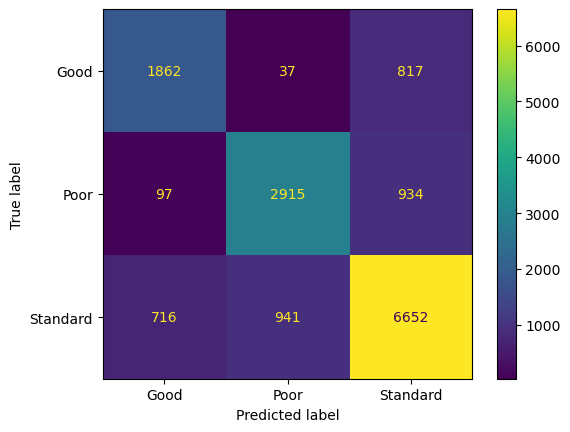

In [60]:
'''
cm_KNN = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_KNN)
'''

### 5.2) Confusion Matrix for Kernel SVM

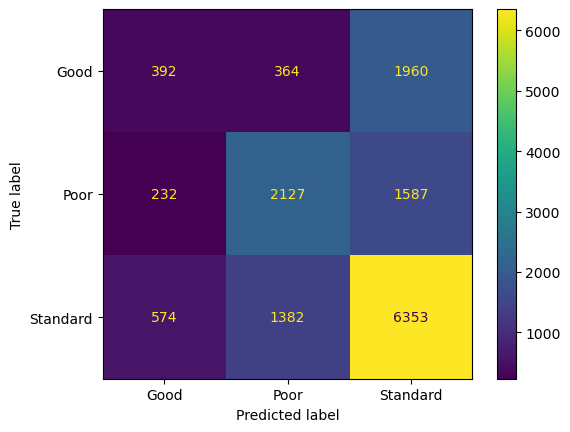

In [61]:
'''
cm_SVM = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVM)
'''

### 5.3) Confusion Matrix for XGBOOST

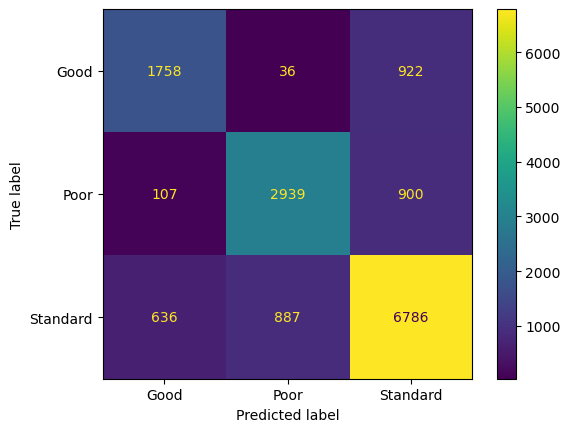

In [62]:
'''
cm_XGB = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_XGB)
'''

### 5.4) Confusion Matrix for CART

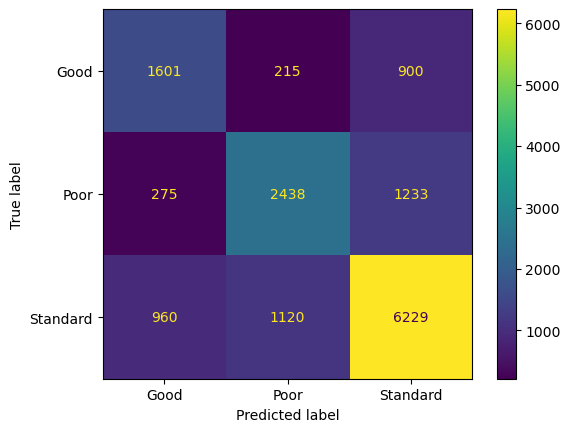

In [63]:
'''
cm_DT = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DT)
'''

### 5.5) Confusion Matrix for ANN

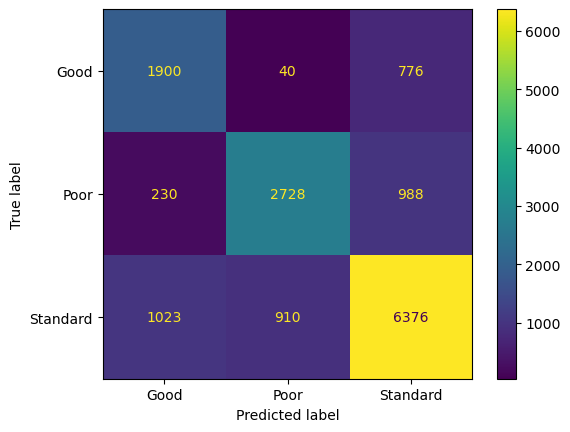

In [41]:
'''
cm_ANN = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ANN)
'''

### 5.6) Visualizing the accuracy of all the models

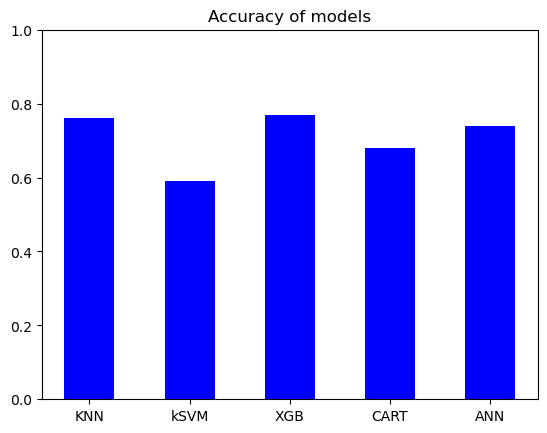

In [51]:
d = {'KNN':0.76,'kSVM':0.59, 'XGB':0.77, 'CART':0.68, 'ANN':0.74} # these are the average scores we got on our executions.

plt.bar(list(d.keys()), d.values(), color='b', width=0.5)
max_y_lim = 1
min_y_lim = 0
plt.ylim(min_y_lim, max_y_lim)
plt.title("Accuracy of models")
plt.show()

### 5.7) Time complexity of all models

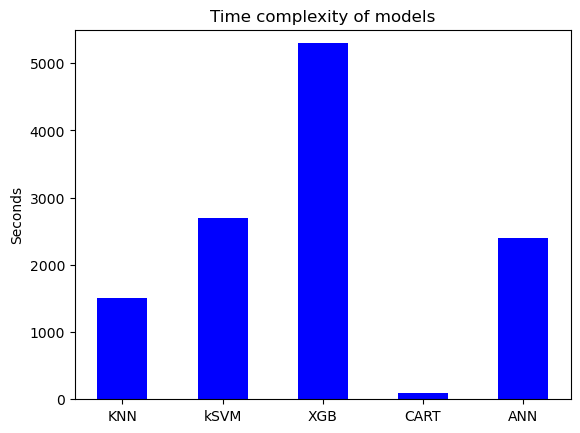

In [58]:
d = {'KNN':1500,'kSVM':2700, 'XGB':5300, 'CART':100, 'ANN':2400} # these are the best times we got on our executions

plt.bar(list(d.keys()), d.values(), color='b', width=0.5)
max_y_lim = 5500
min_y_lim = 0
plt.ylim(min_y_lim, max_y_lim)
plt.ylabel('Seconds')
plt.title("Time complexity of models")
plt.show()